In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA

In [82]:
data = pd.read_csv('AB_NYC_2019.csv')

In [83]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [84]:
data.shape

(48895, 16)

In [85]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [86]:
data.drop(['id', 'host_id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)

In [87]:
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [88]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [89]:
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [90]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>, <Axes: >, <Axes: >]],
      dtype=object)

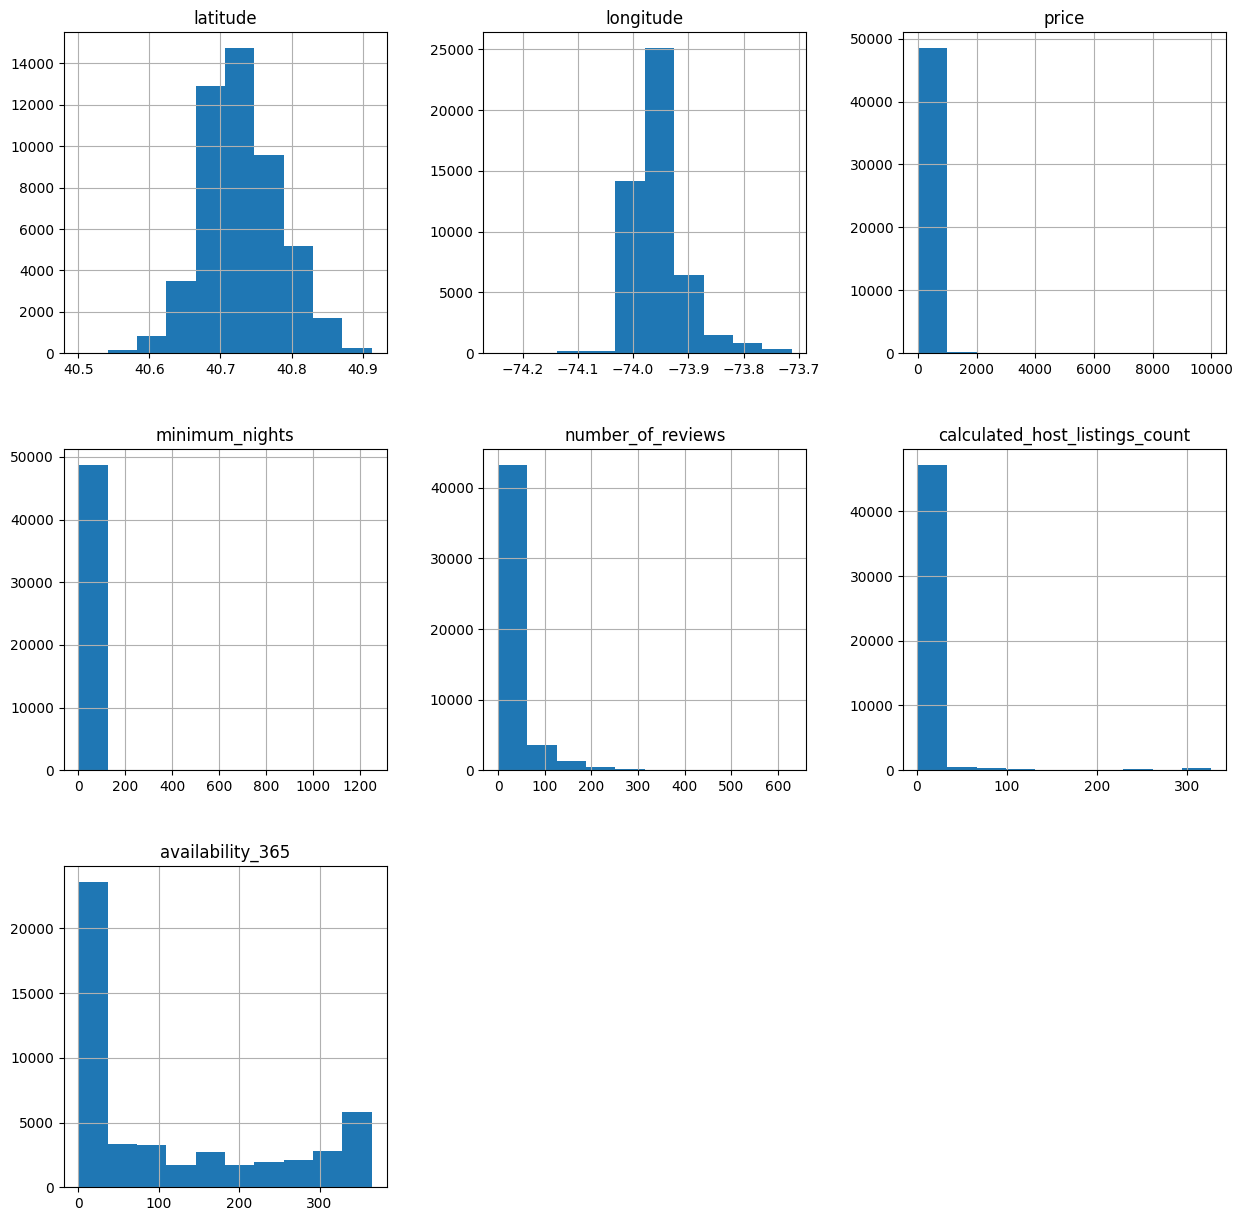

In [91]:
plt.rcParams['figure.figsize'] = (15, 15)
data.hist()

<Axes: xlabel='neighbourhood_group', ylabel='price'>

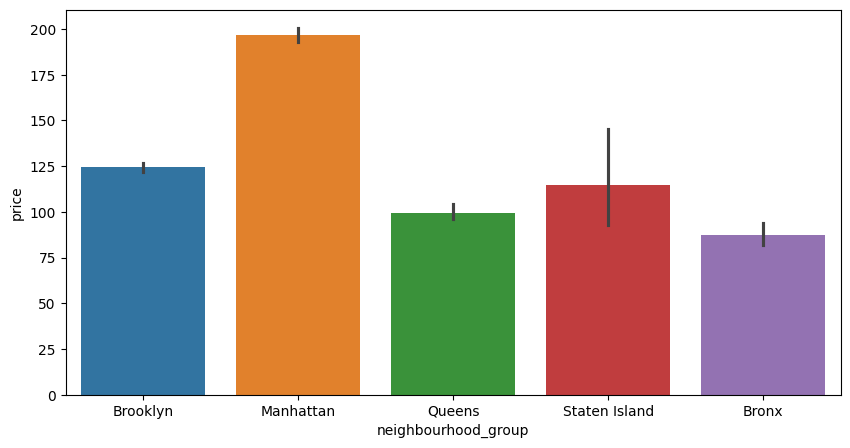

In [92]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data=data, x='neighbourhood_group', y='price', hue='neighbourhood_group')

<Axes: xlabel='room_type', ylabel='price'>

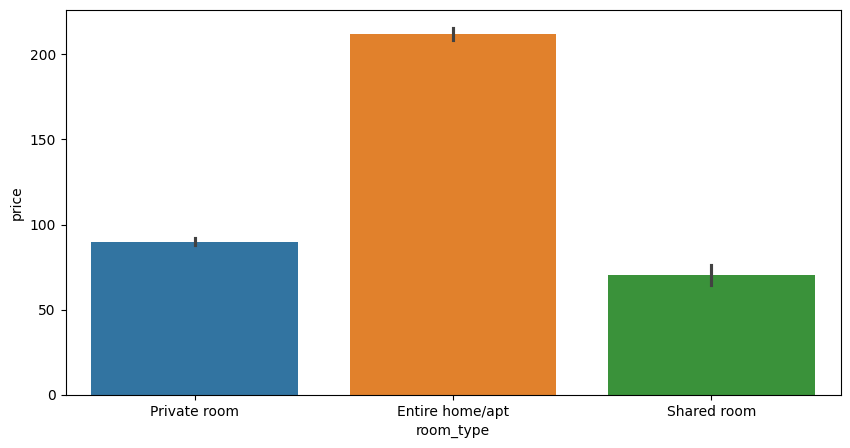

In [93]:
sns.barplot(data=data, x='room_type', y='price', hue='room_type')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

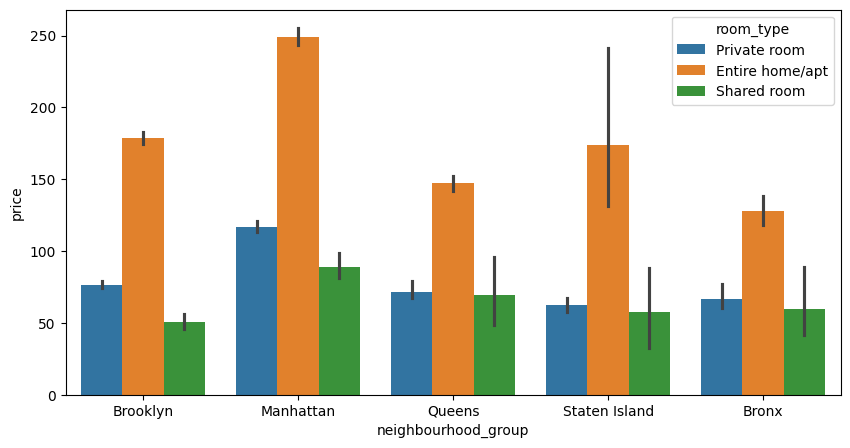

In [94]:
sns.barplot(data=data, x='neighbourhood_group', y='price', hue='room_type')

In [95]:
data.loc[[data['price'].idxmax()]]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9151,Queens,Astoria,40.7681,-73.91651,Private room,10000,100,2,1,0


In [96]:
data.loc[[data['price'].idxmin()]]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,4,28


<Axes: xlabel='neighbourhood_group', ylabel='price'>

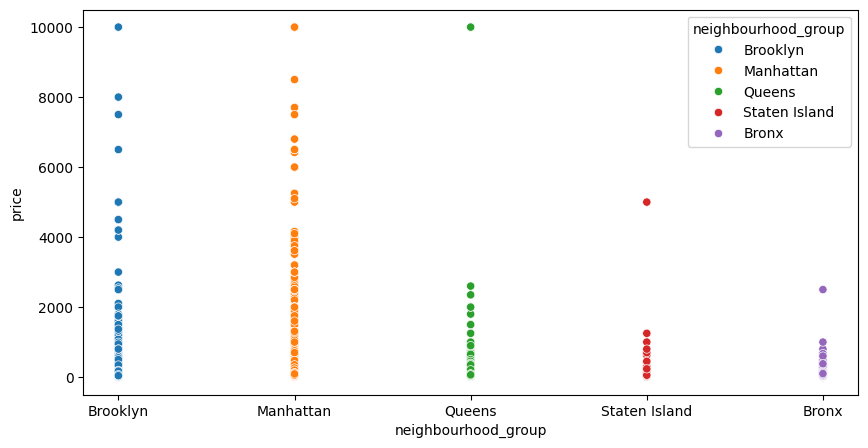

In [97]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.scatterplot(data=data, x='neighbourhood_group', y='price', hue='neighbourhood_group')

In [98]:
data.loc[data['price'] == 10000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,1,0
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,1,0
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,1,83


In [99]:
data.loc[data['price'] == 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,4,28
25433,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,4,127
25634,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,5,0
25753,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2,0
25778,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,1,73
25794,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,6,176
25795,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,6,232
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,6,222
26259,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,1,0
26841,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,6,333


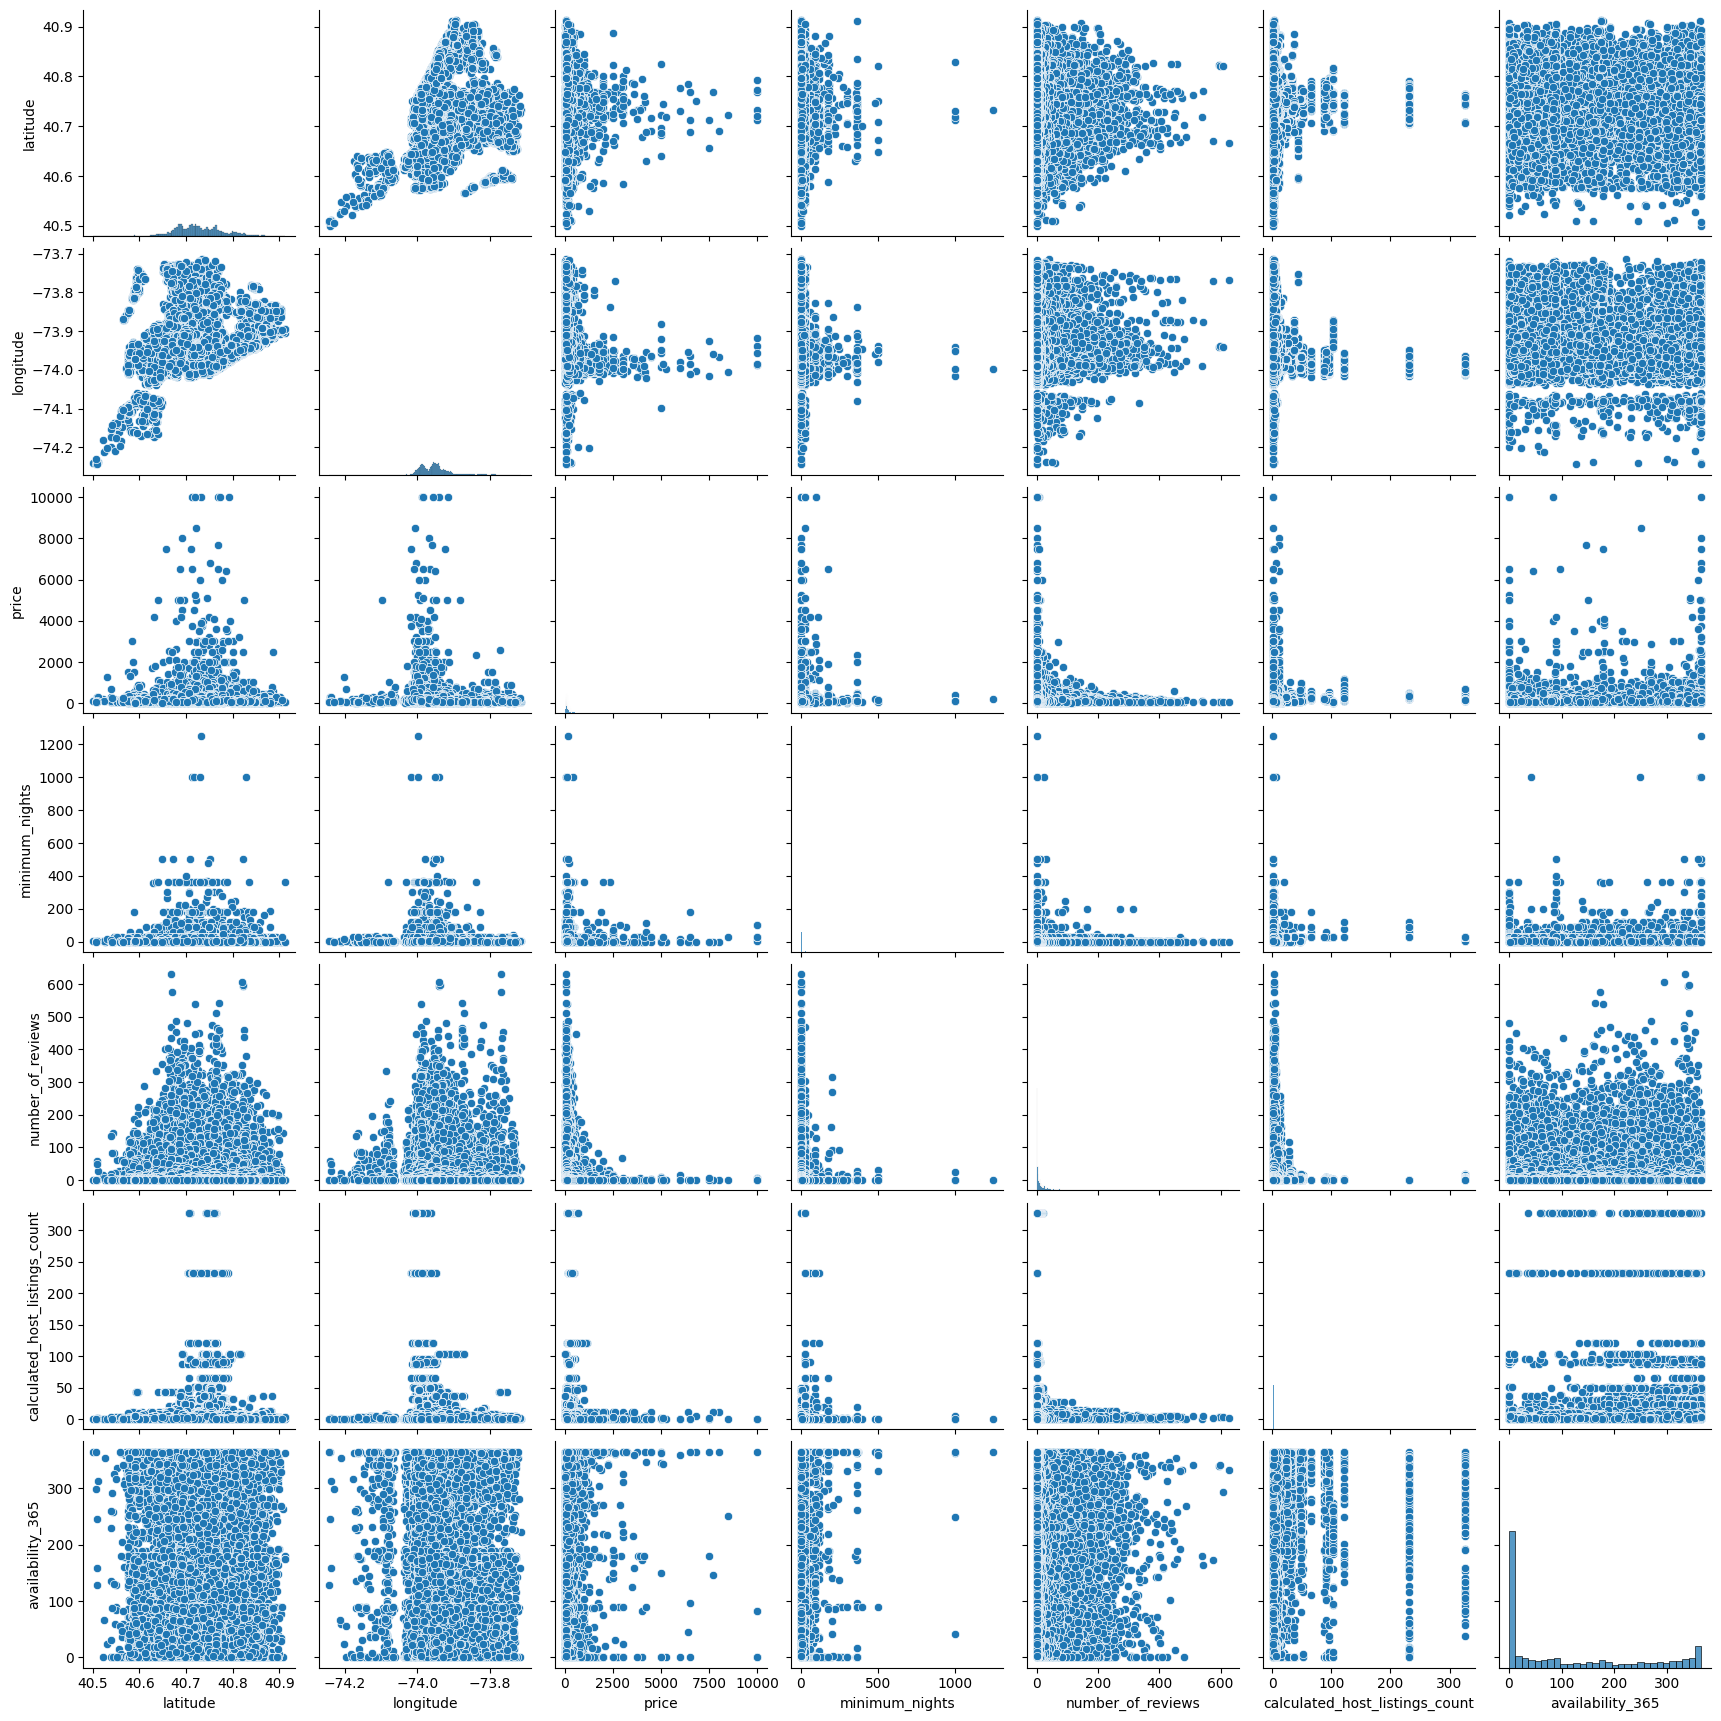

In [100]:
plt.rcParams["figure.figsize"] = (5, 5)
sns.pairplot(data=data)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


Перевести в float, посторить матрицу корреляций, сделать предобработку, далее по дз

Переведем в float

In [104]:
# data[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = data[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].astype('float64')
cols = data.columns.to_list()
for i in cols:
    data[i] = data[i].astype('float64', errors='ignore')
data


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,2.0,9.0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,2.0,36.0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,1.0,27.0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1.0,0.0,6.0,2.0


In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# data.iloc[:, 1]
data.iloc[:, 0] = le.fit_transform(data.iloc[:, 0])
data.iloc[:, 1] = le.fit_transform(data.iloc[:, 1])
data.iloc[:, 4] = le.fit_transform(data.iloc[:, 4])

In [117]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149.0,1.0,9.0,6.0,365.0
1,2,127,40.75362,-73.98377,0,225.0,1.0,45.0,2.0,355.0
2,2,94,40.80902,-73.94190,1,150.0,3.0,0.0,1.0,365.0
3,1,41,40.68514,-73.95976,0,89.0,1.0,270.0,1.0,194.0
4,2,61,40.79851,-73.94399,0,80.0,10.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,70.0,2.0,0.0,2.0,9.0
48891,1,28,40.70184,-73.93317,1,40.0,4.0,0.0,2.0,36.0
48892,2,94,40.81475,-73.94867,0,115.0,10.0,0.0,1.0,27.0
48893,2,95,40.75751,-73.99112,2,55.0,1.0,0.0,6.0,2.0


<Axes: >

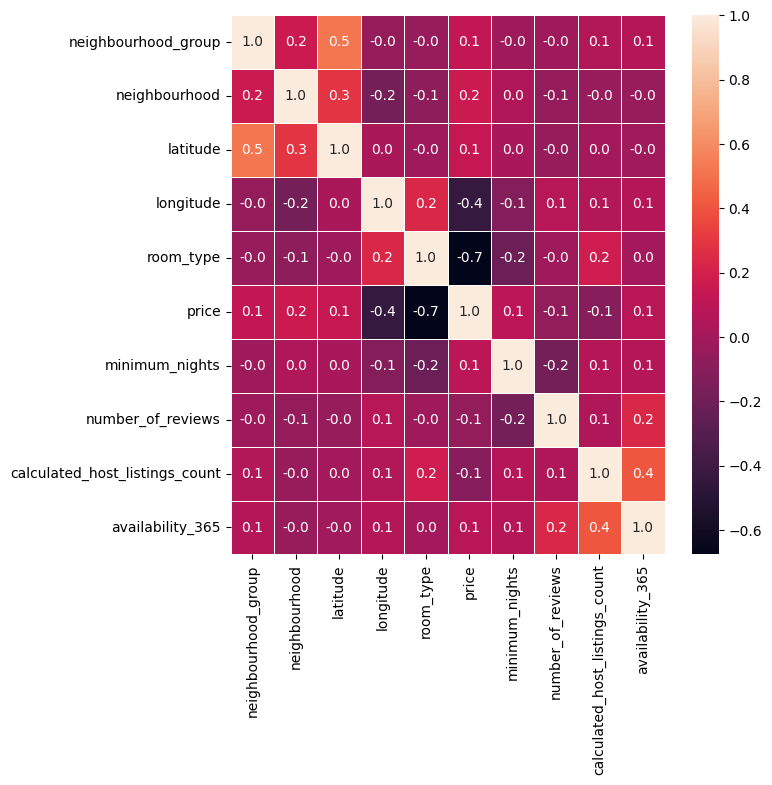

In [121]:
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=.5, fmt='.1f')